In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [2]:
# Carregar dados
df = pd.read_csv("clientes_seguradora.csv")

In [3]:
# Separar X e y
X = df.drop(["ID", "Tipo_Cliente"], axis=1)
y = df["Tipo_Cliente"]

In [4]:
# Definir colunas categóricas e numéricas
categorical_cols = ["Genero", "Estado_Civil"]
numerical_cols = ["Idade", "Rendimento_Anual", "Numero_Polices", "Valor_Total_Seguro", "Score_Satisfacao"]

In [5]:
# Pré-processador para transformar os dados
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [6]:
# Aplicar o pré-processamento completo em X para normalizar e codificar
X_processed = preprocessor.fit_transform(X)

In [7]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Busca pelo melhor k com validação cruzada
k_values = list(range(1, 31))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    scores.append(np.mean(cv_scores))

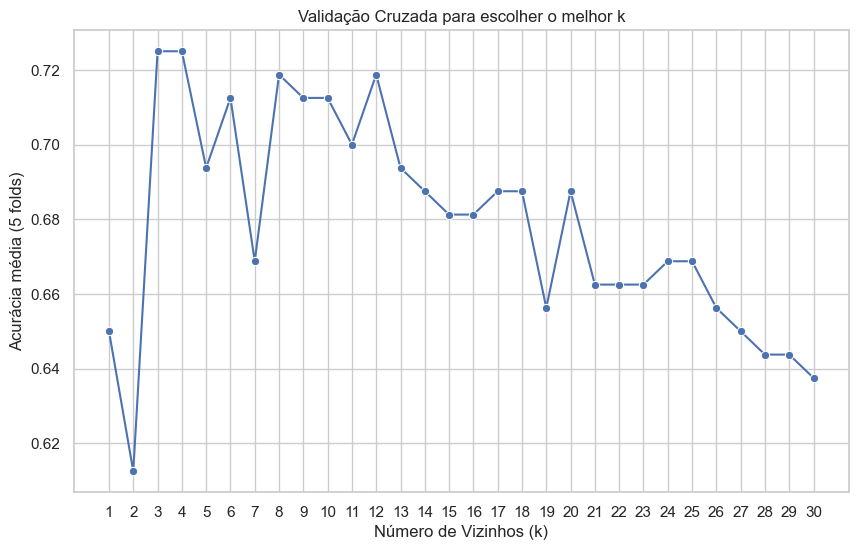

In [9]:
# Plotar acurácia vs k
plt.figure(figsize=(10,6))
sns.lineplot(x=k_values, y=scores, marker='o')
plt.title('Validação Cruzada para escolher o melhor k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia média (5 folds)')
plt.xticks(k_values)
plt.show()

In [10]:
# Treinar com o melhor k
best_k = k_values[np.argmax(scores)]
print(f"Melhor valor de k encontrado: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

Melhor valor de k encontrado: 3


KNeighborsClassifier(n_neighbors=3)

In [11]:
# Prever no conjunto de teste
y_pred = knn_best.predict(X_test)

In [12]:
# Avaliar com várias métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Acurácia no conjunto de teste: {accuracy:.2f}")
print(f"Precisão no conjunto de teste: {precision:.2f}")
print(f"Recall no conjunto de teste: {recall:.2f}")

print("\nRelatório detalhado:")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia no conjunto de teste: 0.70
Precisão no conjunto de teste: 0.72
Recall no conjunto de teste: 0.70

Relatório detalhado:
              precision    recall  f1-score   support

     Economy       0.80      0.50      0.62        16
     Premium       0.75      0.75      0.75         4
    Standard       0.65      0.85      0.74        20

    accuracy                           0.70        40
   macro avg       0.73      0.70      0.70        40
weighted avg       0.72      0.70      0.69        40

